In [121]:
from sklearn import datasets
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [122]:
#Load the Dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [123]:
df.shape

(150, 4)

In [124]:
y = pd.DataFrame(iris['target'])
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [125]:
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


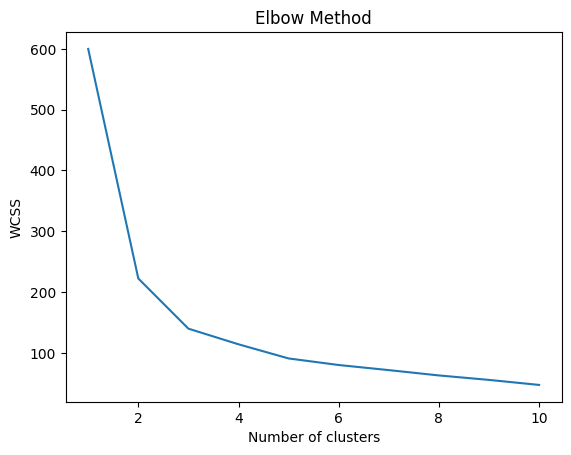

In [126]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [130]:
model = KMeans(n_clusters=3, n_init="auto")
model.fit(scaled_data)

KMeans(n_clusters=3, n_init='auto')

In [131]:
pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
sm.accuracy_score(pred, y)

0.4866666666666667

In [132]:
silhouette_avg1 = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg1}')

Silhouette Score: 0.45663380641237455


<AxesSubplot: >

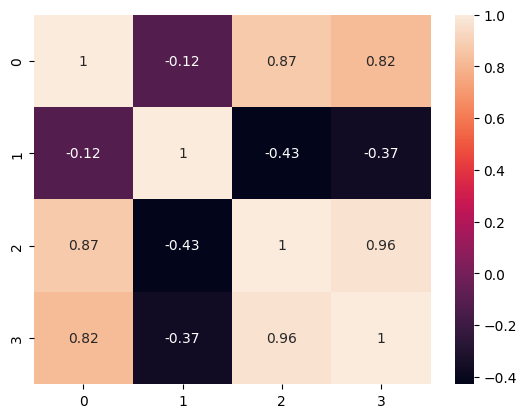

In [133]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr(), annot=True)


Text(0, 0.5, 'cumulative explained variance')

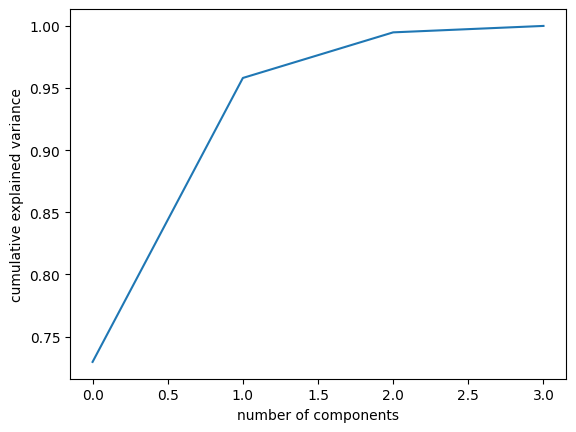

In [134]:
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [135]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()


,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


<AxesSubplot: >

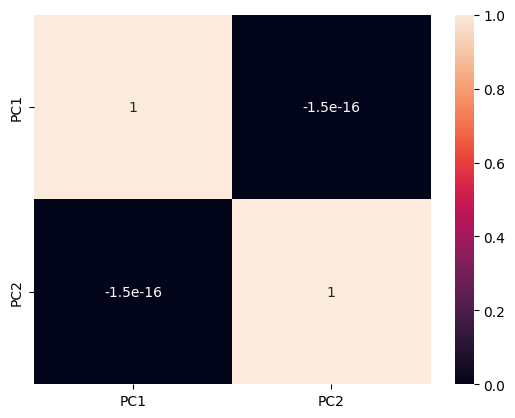

In [136]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr(), annot = True)


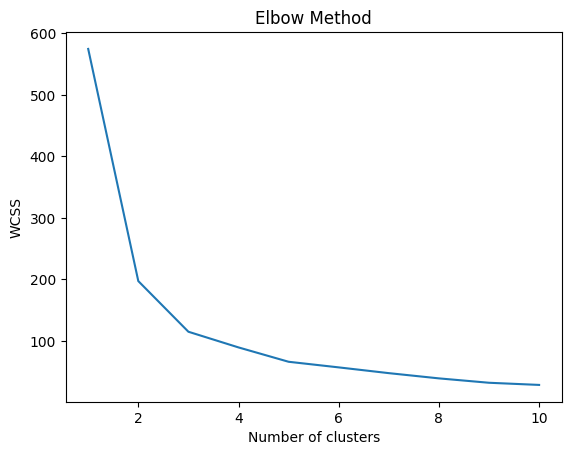

In [137]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [138]:
iris_k_mean_model = KMeans(n_clusters=3, n_init="auto")
iris_k_mean_model.fit(data_pca)

KMeans(n_clusters=3, n_init='auto')

In [139]:
predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)
sm.accuracy_score(predictedY, y)

0.5266666666666666

In [140]:
silhouette_avg = silhouette_score(data_pca, iris_k_mean_model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5227910941742376
